## Quora Insincere Questions Classification Competition
https://www.kaggle.com/c/quora-insincere-questions-classification/data


by Andrew Cho

**Stage 1**

In [1]:
#load libraries 
import pandas as pd
import numpy as np
import matplotlib
from IPython import display
import warnings
warnings.filterwarnings("ignore")

#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# modeling and scoring lib
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split


C:\Users\Chopin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#common model algos
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import lightgbm as lgb

## Meet the Data!

In [3]:
path ='../Quora/'
train = pd.read_csv(path+'train.csv', sep=',')
test = pd.read_csv(path+'test.csv', sep=',')
sample_sub = pd.read_csv(path+'sample_submission.csv', sep=',')

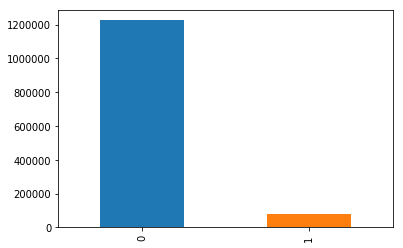

In [4]:
train.target.value_counts().plot(kind='bar')


In [5]:
train.shape[0]

1306122

In [6]:
train.target.value_counts()/train.shape[0]

0    0.93813
1    0.06187
Name: target, dtype: float64

*About 6.2% of the questions are insincere. According to the competition insincere questions have the following characteristics: *

**An insincere question is defined as a question intended to make a statement rather than look for helpful answers. Some characteristics that can signify that a question is insincere:**

- Has a non-neutral tone
- Has an exaggerated tone to underscore a point about a group of people
- Is rhetorical and meant to imply a statement about a group of people
- Is disparaging or inflammatory
- Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype
- Makes disparaging attacks/insults against a specific person or group of people
- Based on an outlandish premise about a group of people
- Disparages against a characteristic that is not fixable and not measurable
- Isn't grounded in reality
- Based on false information, or contains absurd assumptions
- Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers
- The training data includes the question that was asked, and whether it was identified as insincere (target = 1). The ground-truth labels contain some amount of noise: they are not guaranteed to be perfect.


**Sample insincere questions**

In [7]:
train.loc[train.target == 1,:].sample(100)

,qid,question_text,target
979327,bfdb4625a57d2bd796ed,Why is an unmarked dump ready for the ashes of...,1
306763,3c164ffee0735bdc5a07,Why everybody support the Jewish reclamation o...,1
929513,b629707a417625723338,I don’t remember signing up for this. Am I in ...,1
529092,6798297a09c0a7738181,How do you punish someone for being depressed?,1
1054775,ceb0b63985569c2683c1,Why does gay excel keep rounding numbers?,1
454278,58fe2b048cfb31e9aae3,Why do not most men today bully their daughter...,1
472444,5c82c451a02181eabb5f,Why do Hindus treat Dalits with such disdain?,1
145282,1c6ca62c122f77289ea7,What are your views on the situation where a m...,1
631709,7bb53b18cd53708a1295,Muhammad spoke to his dinner roasted lamb whic...,1
192468,259ea8d3500c30f437c4,Can a gorilla breed with a white human woman?,1


## Modeling: Data Prepreation

In [8]:
X = train['question_text']
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
print('-'*25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

-------------------------
(979591,)
(326531,)
(979591,)
(326531,)


In [9]:
#crate a vectorizer 
vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
#learn the vocab of the training data and transform them into a document term matrix
X_test_dtm = vect.transform(X_test)
#fit it in the X_test data set

## Modeling: Benchmark Score of Naive Bayes

In [10]:
#running a basic model on Naive bayes and param tuning.
def token_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    #learn the vocab of the training data and transform them into a document term matrix
    X_test_dtm = vect.transform(X_test)
    print('Features Count: ', X_train_dtm.shape[1])
    
    nb = MultinomialNB()
    #fit the model
    nb.fit(X_train_dtm, y_train)
    #prediction from the classification
    y_pred = nb.predict(X_test_dtm)
    print('Score in F1:', '%.2f'%metrics.f1_score(y_test, y_pred))
    print('false positives-----')
    print(X_test[y_test<y_pred][:5])

    print('\nfalse negatives-----')
    print(X_test[y_test>y_pred][:5])

In [11]:
vect = CountVectorizer()
token_test(vect)

Features Count:  167362
Score in F1: 0.56
false positives-----
1101293    As a transgender teenager, are you discriminat...
1229324    Why are so many people rejecting global cooper...
884880     Why did Russia and China refuse to veto the in...
23106                    Why do liberals hate heterosexuals?
867201     Are all the random pro-Trump "Questions" actua...
Name: question_text, dtype: object

false negatives-----
762142     Would believe that wrote tO gov CUOMO THAT HE ...
581912     Why is the U.N. ignoring Iceland’s Down syndro...
1254445    Aristotle? Aristotle will be of no use to U wh...
379987            What is it like to have sex with your mom?
463590     Why is my friend saying "Islam is like last st...
Name: question_text, dtype: object


**NaiveBayes with no param tuning achieved .56 so that's a good starting point

In [12]:
#vect = TfidfVectorizer(min_df=3, stop_words='english', ngram_range=(1,2))
#vect = TfidfVectorizer()
vect = TfidfVectorizer(norm=None, min_df=3, stop_words='english', ngram_range=(1,2))
token_test(vect)

Features Count:  320970
Score in F1: 0.42
false positives-----
1101293    As a transgender teenager, are you discriminat...
1229324    Why are so many people rejecting global cooper...
82794      Which teacher would you prefer for English pra...
884880     Why did Russia and China refuse to veto the in...
404524          How can a 17 year old autistic kid get laid?
Name: question_text, dtype: object

false negatives-----
1254445    Aristotle? Aristotle will be of no use to U wh...
463590     Why is my friend saying "Islam is like last st...
1161336                How do I get hard and fast in school?
674983     In the world there are 2 guns for every single...
493647     Do Robert Kiyosaki and Donald Trump hurt their...
Name: question_text, dtype: object


## Modeling: Benchmark Score of Log Reg

In [13]:
from sklearn.linear_model import LogisticRegression
vect = TfidfVectorizer(norm=None, min_df=3, stop_words='english', ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train)
#learn the vocab of the training data and transform them into a document term matrix
X_test_dtm = vect.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
#prediction from the classification
y_pred = logreg.predict(X_test_dtm)
print('Score :', '%.2f'%metrics.f1_score(y_test, y_pred))


Score : 0.51


# EDA ..To be updated

In [14]:
#Final Submission Prep

In [15]:
X = train['question_text']
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
print('-'*25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

-------------------------
(979591,)
(326531,)
(979591,)
(326531,)
